In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns


import warnings

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')

In [29]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [4]:
df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [5]:
df.drop(columns=['id'],inplace=True)

In [6]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

- No missing data
- All int64

In [4]:
train = df.drop(columns=['FloodProbability'])


In [5]:
df_test.drop(columns=['id'],inplace=True)

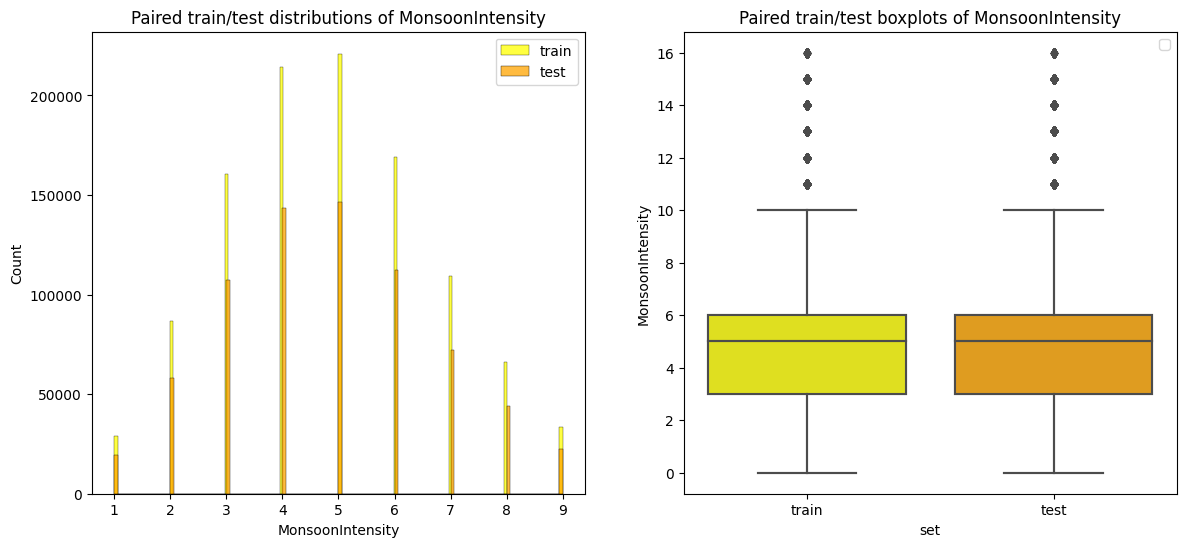

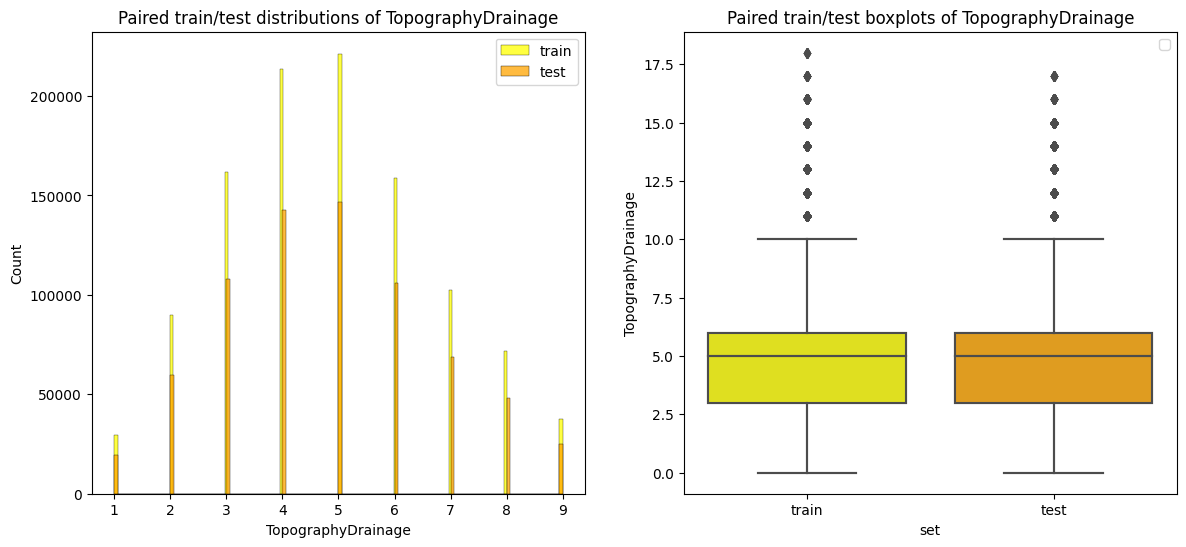

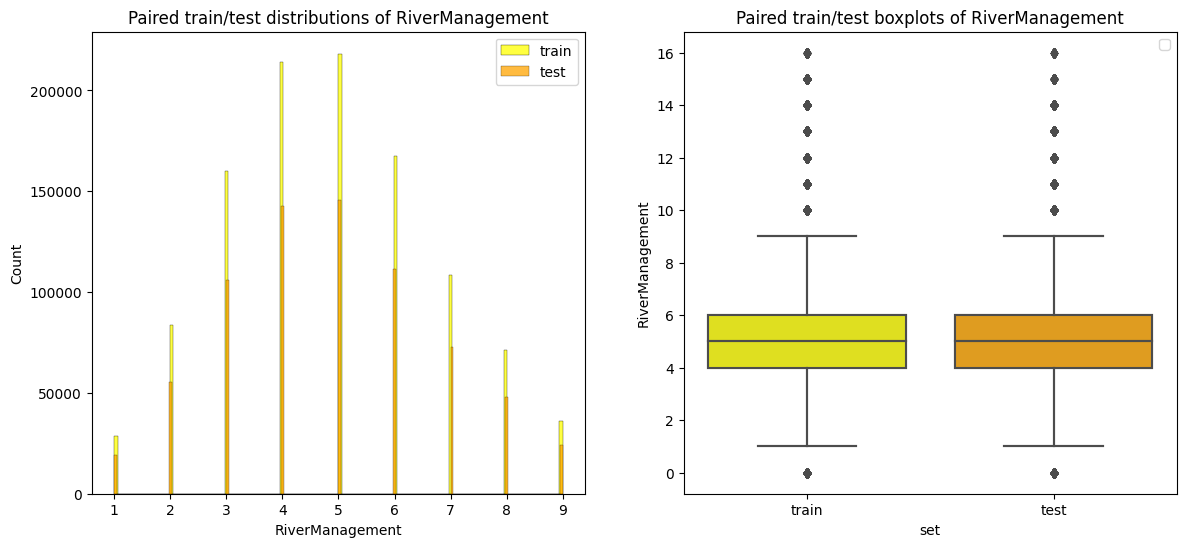

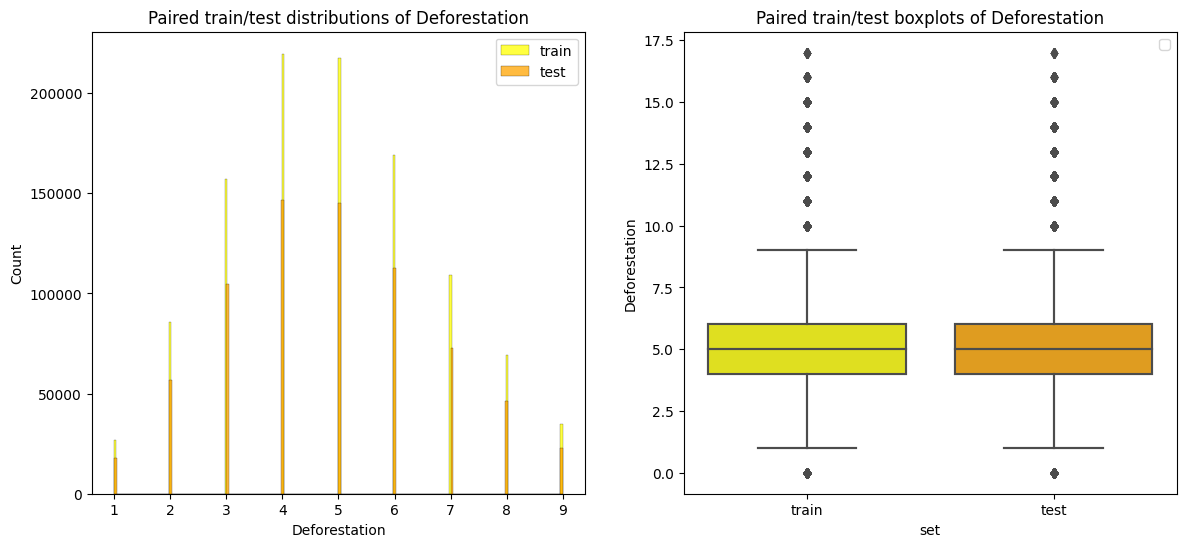

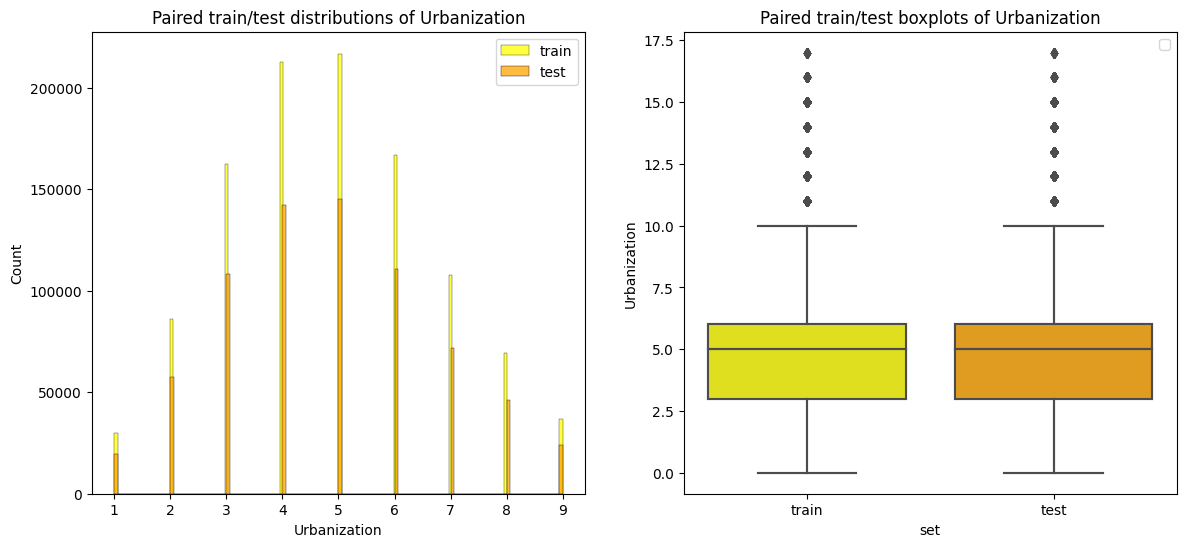

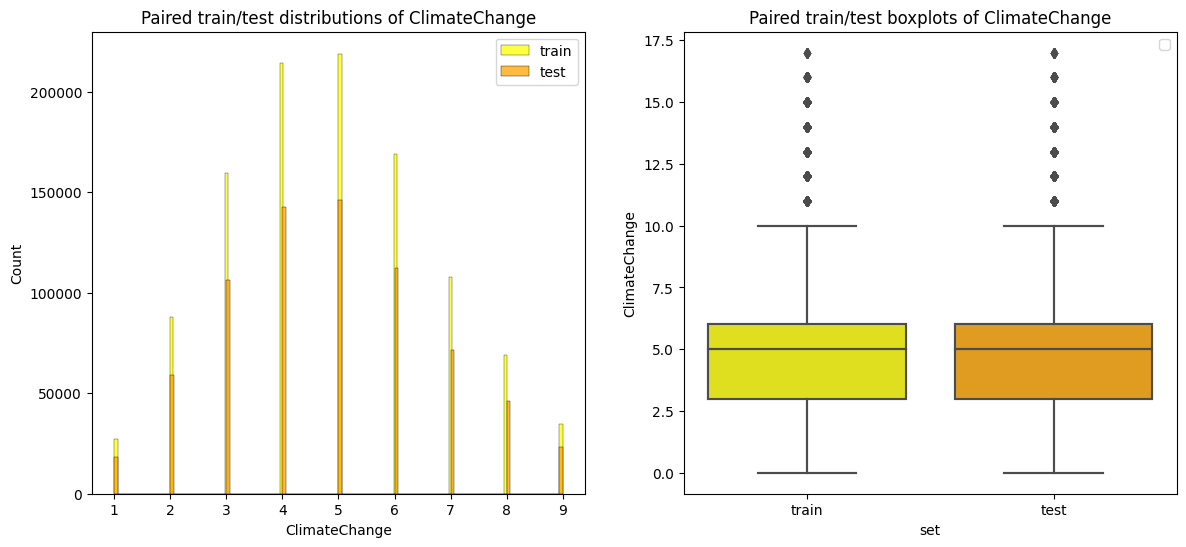

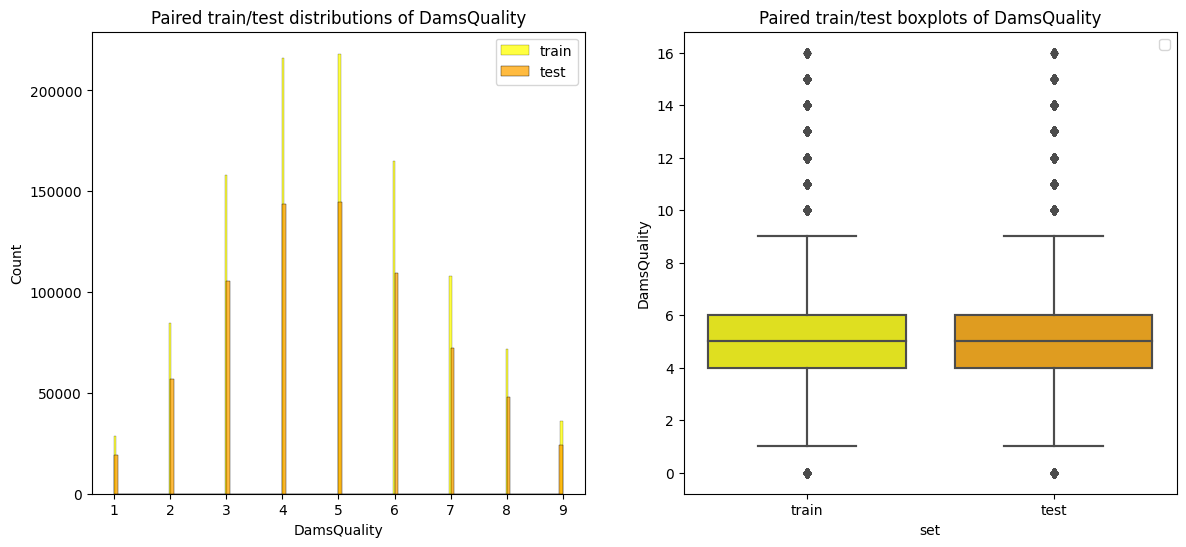

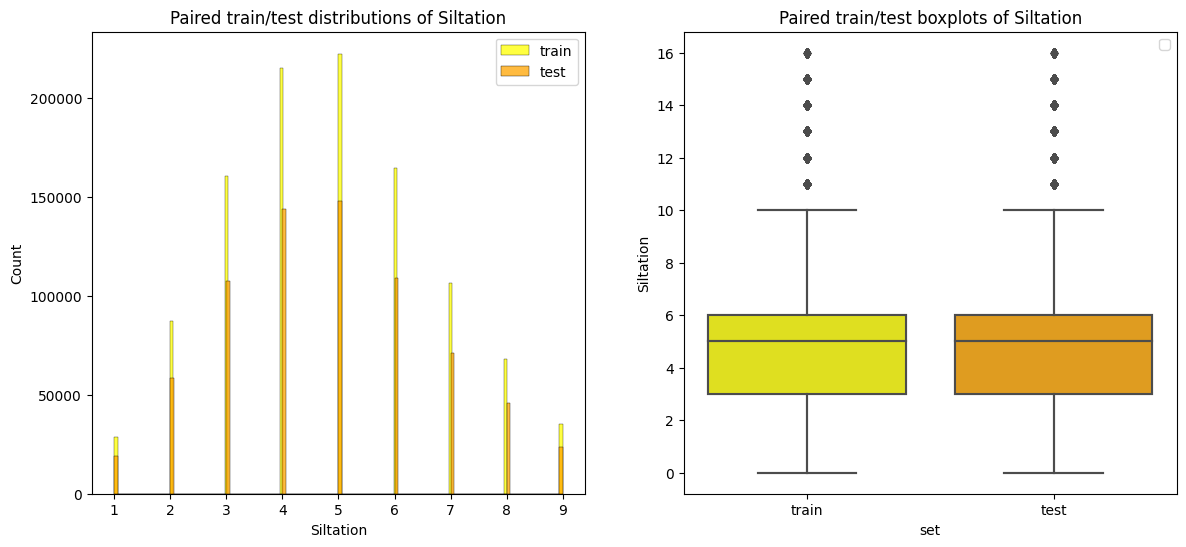

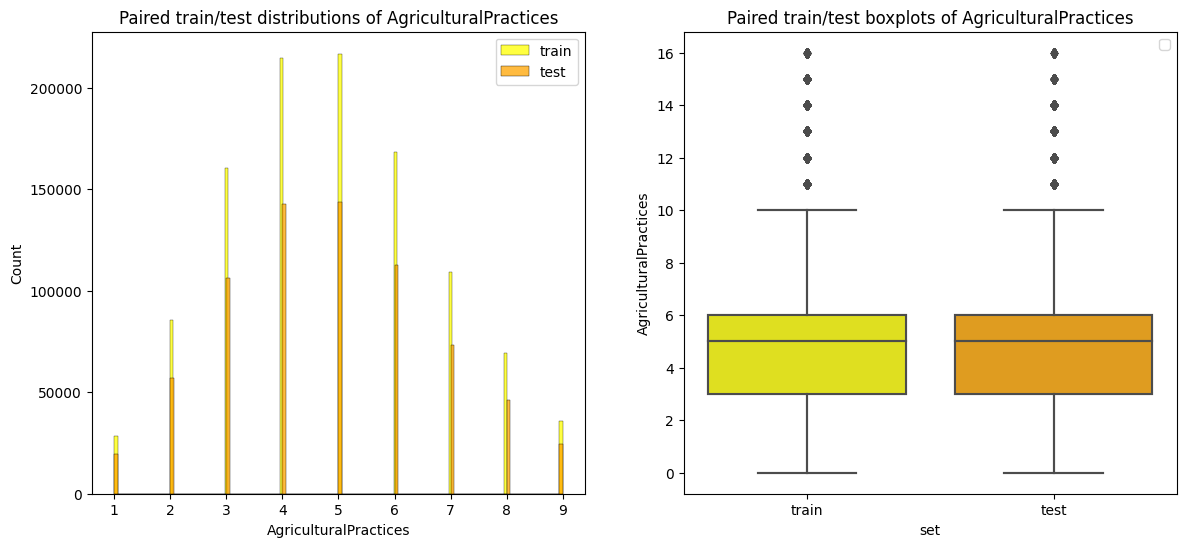

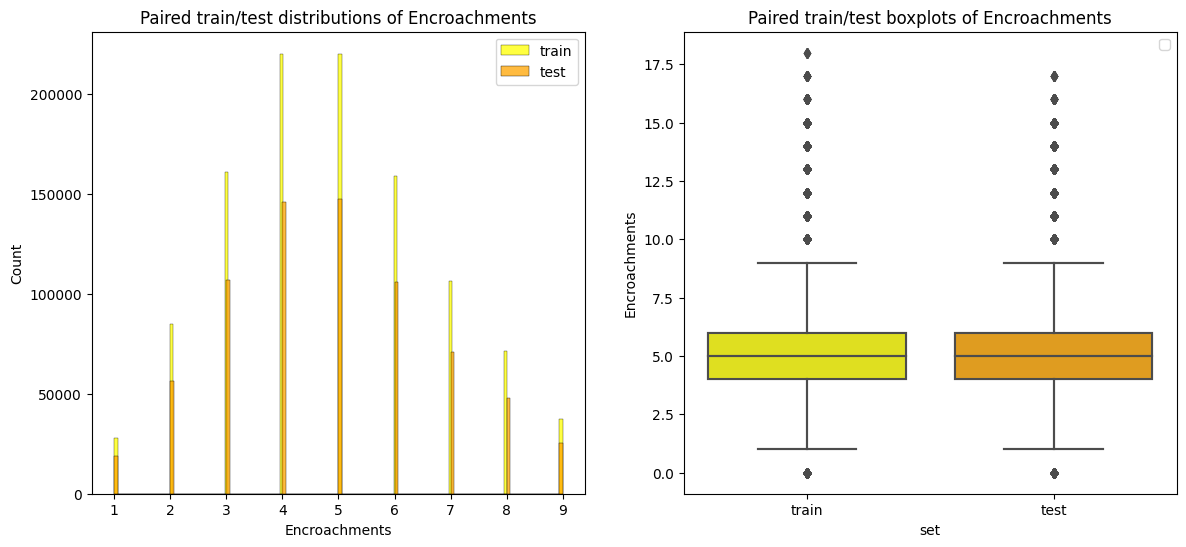

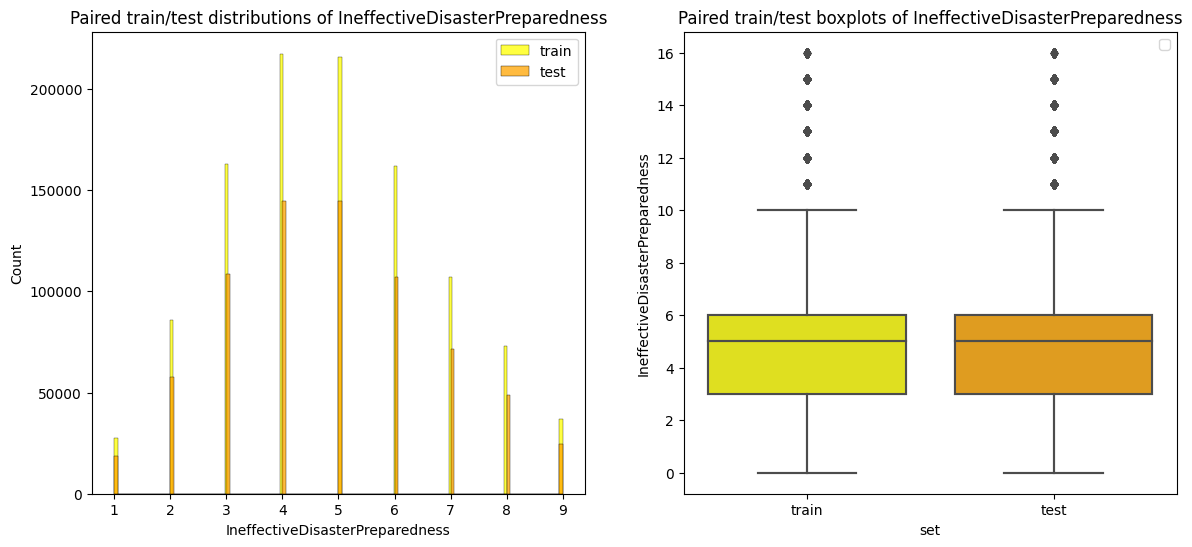

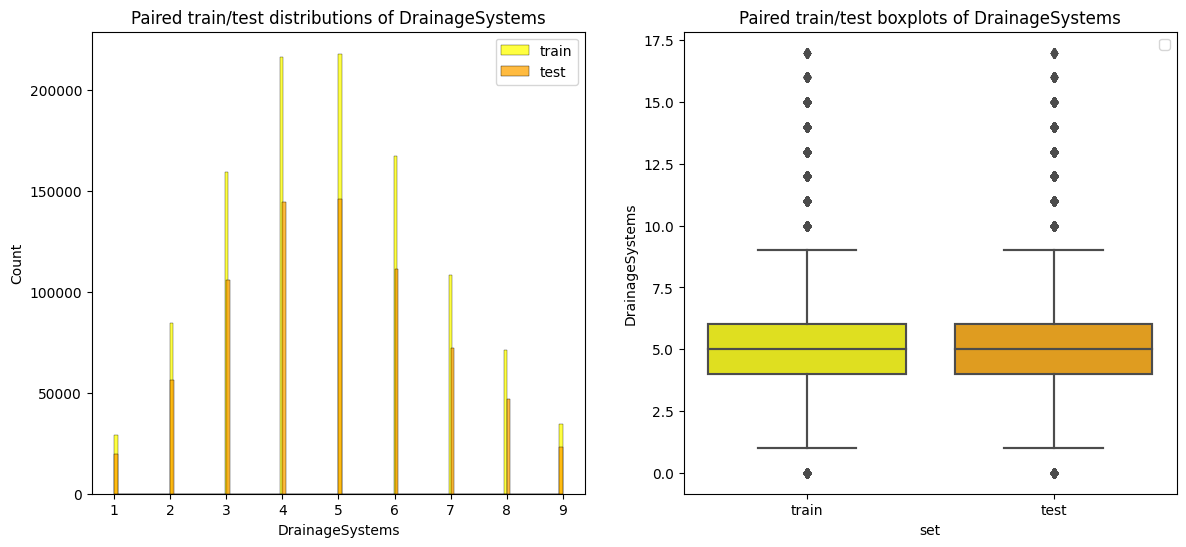

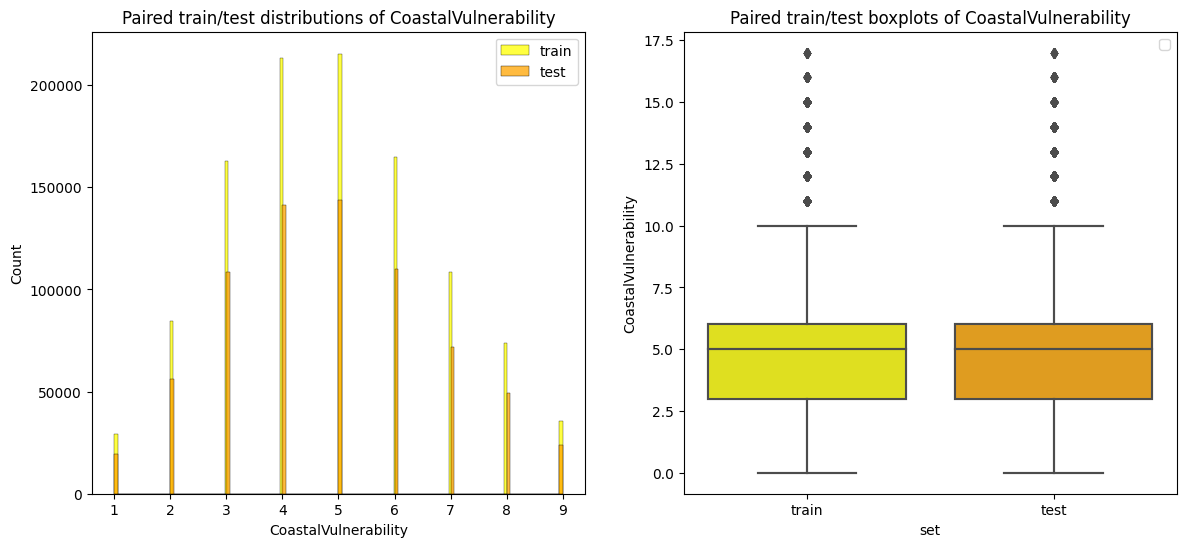

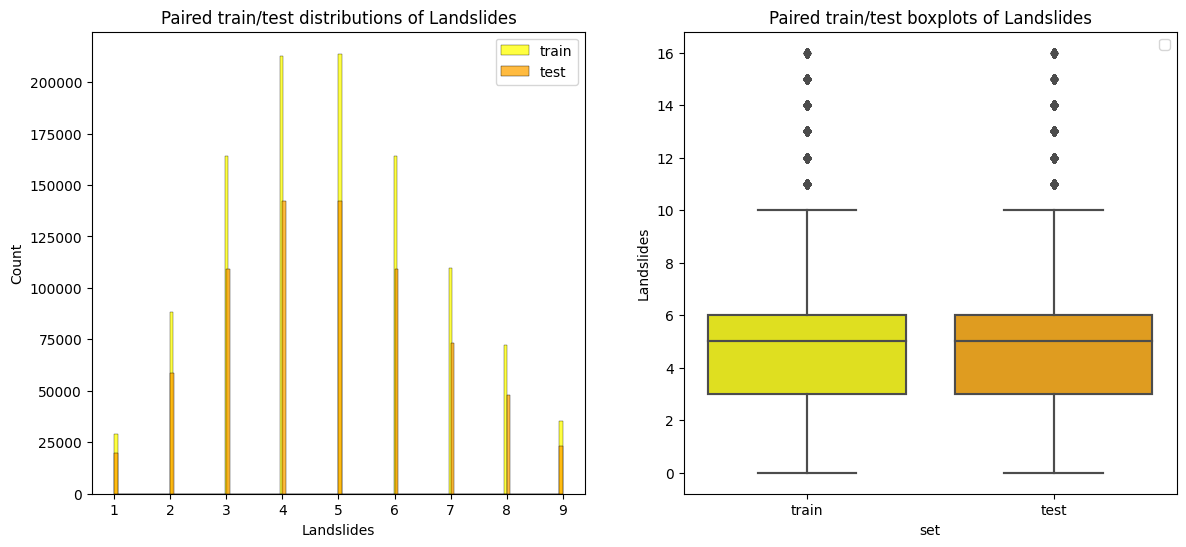

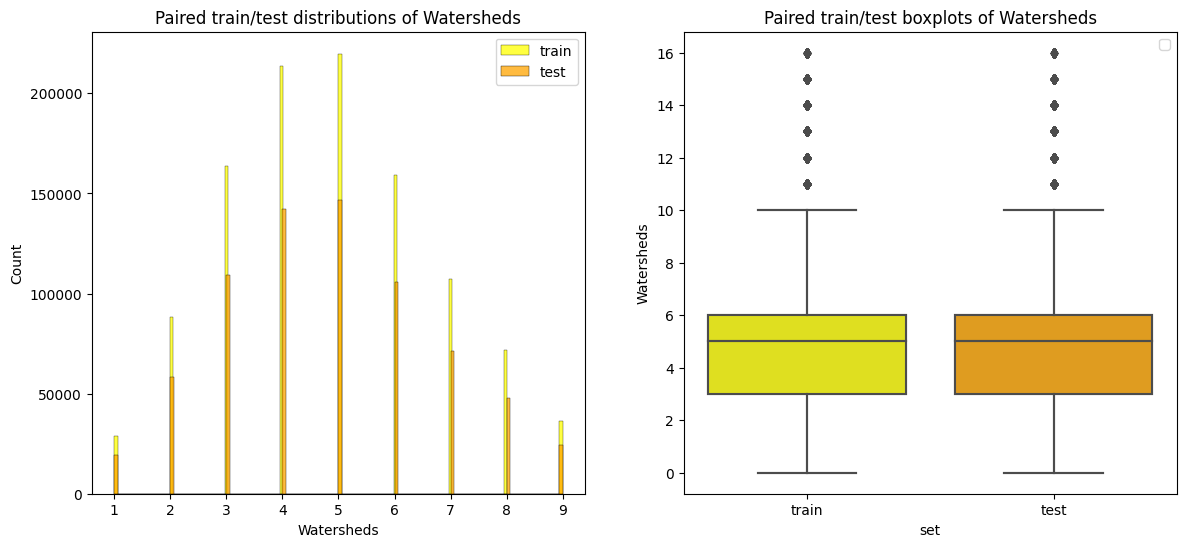

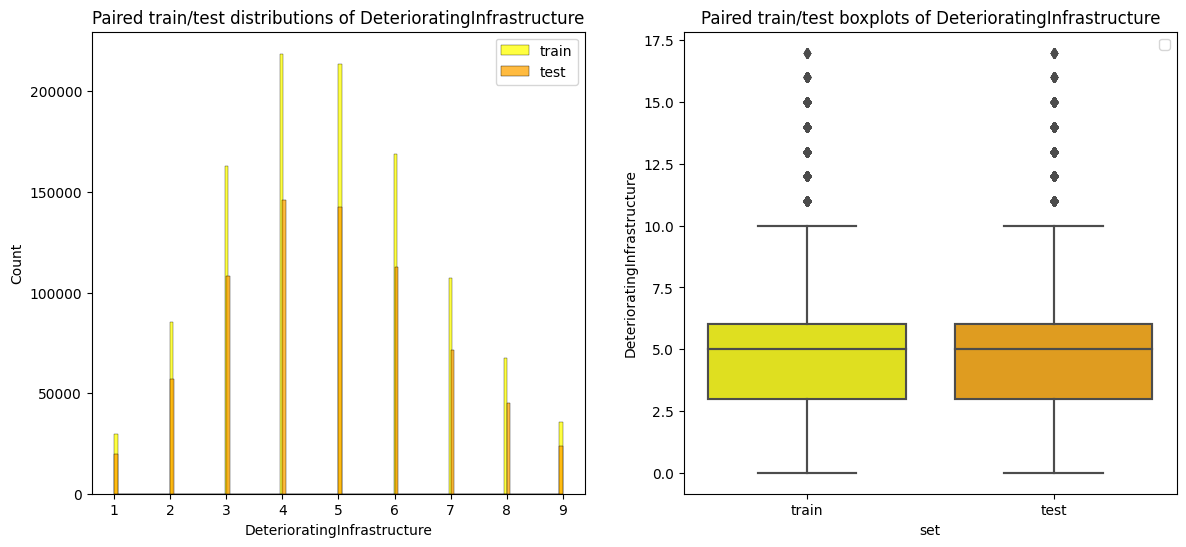

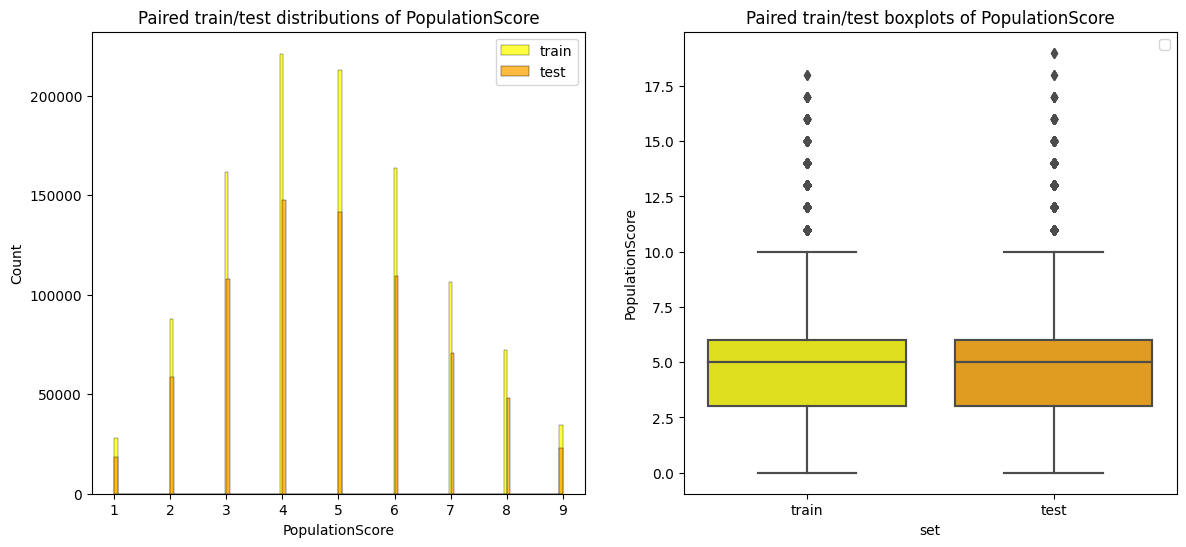

In [16]:
color_list = ["yellow", "orange"]
def plot_distribution_pairs(train, df_test, feature, hue="set", palette=None):
    data_df = train.copy()
    data_df['set'] = 'train'
    data_df = pd.concat([data_df, df_test.copy()]).fillna('test')
    data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    for i, s in enumerate(data_df[hue].unique()):
        selection = data_df.loc[data_df[hue]==s, feature]
        # Filter 'selection' to include only the central 95% of the data
        q_025, q_975 = np.percentile(selection, [2.5, 97.5])
        selection_filtered = selection[(selection >= q_025) & (selection <= q_975)]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            sns.histplot(selection_filtered, color=palette[i], ax=axes[0], label=s)
            sns.boxplot(x=hue, y=feature, data=data_df, palette=palette, ax=axes[1])
    axes[0].set_title(f"Paired train/test distributions of {feature}")
    axes[1].set_title(f"Paired train/test boxplots of {feature}")
    axes[0].legend()
    axes[1].legend()
    plt.show()


for feature in train.columns[:-3]:
    plot_distribution_pairs(train, df_test, feature, palette=color_list)

The train and test datasets look very similar.

# AutoML

In [7]:
import h2o
from h2o.automl import H2OAutoML

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu220.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp129f877w
  JVM stdout: /tmp/tmp129f877w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp129f877w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_hyk2h1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [9]:
df_aml = h2o.import_file("/kaggle/input/playground-series-s4e5/train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
df_aml = df_aml[1:]

In [45]:
df_aml

MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.45
6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.53
3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
5,4,1,4,2,4,6,6,7,5,5,3,5,5,4,4,6,8,3,2,0.44
8,3,1,2,3,7,3,4,6,7,5,2,5,6,4,5,6,3,4,6,0.46
6,6,5,7,5,5,3,5,5,5,3,5,3,5,5,8,6,8,5,6,0.595
5,2,8,5,4,5,2,4,5,5,2,9,2,7,3,4,6,4,5,5,0.505
4,2,3,5,8,6,5,5,7,6,4,6,3,3,4,4,3,3,5,6,0.455


In [11]:
response_column = "FloodProbability"

In [12]:
predictor_columns = df_aml.columns
predictor_columns.remove(response_column)

In [13]:
predictor_columns = predictor_columns


In [14]:
predictor_columns

['MonsoonIntensity',
 'TopographyDrainage',
 'RiverManagement',
 'Deforestation',
 'Urbanization',
 'ClimateChange',
 'DamsQuality',
 'Siltation',
 'AgriculturalPractices',
 'Encroachments',
 'IneffectiveDisasterPreparedness',
 'DrainageSystems',
 'CoastalVulnerability',
 'Landslides',
 'Watersheds',
 'DeterioratingInfrastructure',
 'PopulationScore',
 'WetlandLoss',
 'InadequatePlanning',
 'PoliticalFactors']

In [62]:
# Define AutoML settings (optional customization)
automl_settings = {
    "max_runtime_secs": 3600,  # Maximum runtime in seconds (1 hour)
    "stopping_metric": "rmse",  # Early stopping metric (Root Mean Squared Error)
    "stopping_tolerance": 0.01,  # Tolerance for early stopping
    "seed": 123,  # Random seed for reproducibility (optional)
    #"exclude_algos": ["DeepLearning","DRF",],  # Exclude specific algorithms (optional)
#"include_algos": ["GLM"]
    "algo_metalearning": {"algo_family": "xgboost"}
}

In [63]:
# Start AutoML with XGBoost as a priority
aml = H2OAutoML(
    max_runtime_secs=automl_settings["max_runtime_secs"],
    stopping_metric=automl_settings["stopping_metric"],
    stopping_tolerance=automl_settings["stopping_tolerance"],
    seed=automl_settings["seed"],
    #exclude_algos=automl_settings["exclude_algos"],
)

In [64]:
aml.train(x=predictor_columns, y=response_column, training_frame=df_aml)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_6_20240501_192747


Status of Neuron Layers: predicting FloodProbability, regression, gaussian distribution, Quadratic loss, 441 weights/biases, 13.6 KB, 97,291 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  --------------------  -----------------------
    1        20       Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.0039807770756306125  0.003078928217291832   0.0         0.035366357708453505   0.19413435459136963  0.7338895886339429    0.2596501111984253
    3        10       Rectifier  0.0        0.0   0.0   0.004617223708191886   0.0057677216827869415  0.0         -0.035975484908558425  0.30983853340148926  0.9844494840112589    0.10059824585914612
    4        10       Rectifier  0.0        0.0   0.0   0.015242138506146148   0.04018738865852356    0.0         0.005560720777139067   0.30003678798675537  0.9562604752959281    0.059805259108543396
    5        1        Linear                0.0   0.0   0.0010371989323175513  0.00101765850558877    0.0         -0.14153965138830243   0.40412425994873047  -0.02521884514191552  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.00043718079943524653
RMSE: 0.020908868918122915
MAE: 0.017024173789609746
RMSLE: 0.013985602094068112
Mean Residual Deviance: 0.00043718079943524653

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 0.0003652888912866406
RMSE: 0.019112532309629737
MAE: 0.014965991892614876
RMSLE: 0.012778643827486079
Mean Residual Deviance: 0.0003652888912866406

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     0.0150416    0.000267333  0.0148374     0.0148977     0.0153338     0.0148084     0.0153309
mean_residual_deviance  0.000368479  3.162e-06    0.000367648   0.000372026   0.000367251   0.000364263   0.000371207
mse                     0.000368479  3.162e-06    0.000367648   0.000372026   0.000367251   0.000364263   0.000371207
r2                      0.858472     0.00157866   0.859172      0.85675       0.858996      0.86047       0.856973
residual_deviance       0.000368479  3.162e-06    0.000367648   0.000372026   0.000367251   0.000364263   0.000371207
rmse                    0.0191957    8.23802e-05  0.0191742     0.019288      0.0191638     0.0190857     0.0192667
rmsle                   0.0128325    5.09983e-05  0.0128157     0.0128813     0.0128217     0.0127611     0.0128827

Scoring History: 
    timestamp            duration    training_speed    epochs     iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  ---------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-05-01 20:26:20  0.000 sec                     0          0             0          nan              nan                  nan             nan
    2024-05-01 20:26:20  54.248 sec  118358 obs/sec    0.0870257  1             97291      0.0209089        0.000437181          0.0170242       0.83089

Variable Importances: 
variable                         relat

In [55]:
best_model = aml.get_best_model()

# View model details (optional)
print(best_model)

Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_1_AutoML_5_20240501_190646


Status of Neuron Layers: predicting FloodProbability, regression, gaussian distribution, Quadratic loss, 441 weights/biases, 15.3 KB, 7,899,476 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        20       Input      0.0
    2        10       Rectifier  0.0        0.0   0.0   0.002864761616947362   0.002534381113946438   0.0         0.08220773795852437   0.25661301612854004  0.09803175076401112  0.7413432598114014
    3        10       Rectifier  0.0        0.0   0.0   0.04212573701137444    0.09905412

In [56]:
test_data = h2o.import_file("/kaggle/input/playground-series-s4e5/test.csv")
predictions = best_model.predict(test_data)

# Print or use the predictions as needed
print(predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
  predict
 0.575677
 0.457852
 0.45112
 0.471384
 0.471669
 0.507454
 0.535968
 0.528925
 0.475404
 0.575394
[745305 rows x 1 column]



In [57]:
sub= predictions.as_data_frame()


/opt/conda/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [58]:
sub['id'] = df_test['id']

In [59]:
sub = sub[['id'] + list(sub.columns[:-1])]

In [61]:
sub.to_csv('submission4.csv', index=False)
sub.head()

,id,predict
0,1117957,0.575677
1,1117958,0.457852
2,1117959,0.451120
3,1117960,0.471384
4,1117961,0.471669
